### Followed from [Coursera](https://www.coursera.org/learn/machine-learning/ungradedLab/kIf25/optional-lab-feature-scaling-and-learning-rate/lab?path=%2Fnotebooks%2FC1_W2_Lab03_Feature_Scaling_and_Learning_Rate_Soln.ipynb)

## Tools:
- NumPy

In [11]:
def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

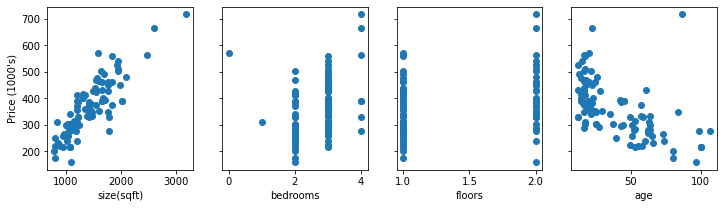

In [12]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [18]:
#This version saves more values and is more verbose than the assigment versons
def gradient_descent_houses(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
       
    return w, b, hist #return w,b and history for graphing

In [20]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i],w) + b       
        cost = cost + (f_wb_i - y[i])**2              
    cost = cost/(2*m)                                 
    return(np.squeeze(cost)) 

In [22]:
#Function to calculate the cost
def compute_cost_matrix(X, y, w, b, verbose=False):
    """
    Computes the gradient for linear regression 
     Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,)) actual value 
      w : (array_like Shape (n,)) parameters of the model 
      b : (scalar               ) parameter of the model 
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)                      
    """ 
    m,n = X.shape

    # calculate f_wb for all examples.
    f_wb = X @ w + b  
    # calculate cost
    total_cost = (1/(2*m)) * np.sum((f_wb-y)**2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)
        
    return total_cost

In [24]:
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """
    m,n = X.shape
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw

In [32]:
#set alpha to 9.9e-7
import copy
import math
def run_gradient_descent(X,y,iterations=1000, alpha = 1e-6):

    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent_houses(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    
    return(w_out, b_out, hist_out)

def plot_cost_i_w(X,y,hist):
    ws = np.array([ p[0] for p in hist["params"]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [compute_cost(X,y,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist["iter"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist["cost"])
    plt.show()

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

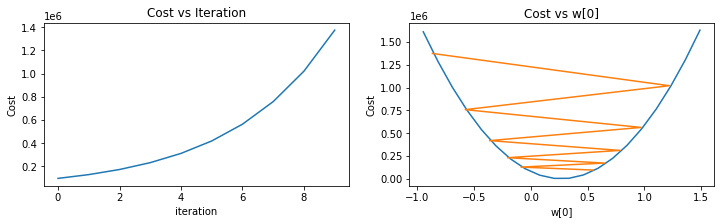

In [33]:
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)
plot_cost_i_w(X_train, y_train, hist)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

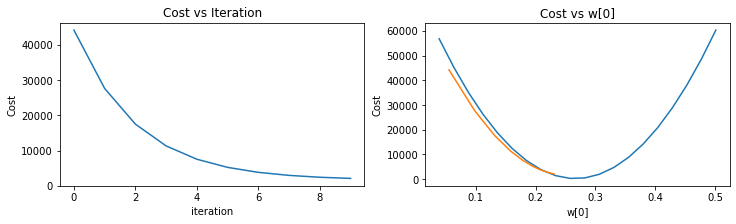

In [34]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)
plot_cost_i_w(X_train,y_train,hist)

In [35]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

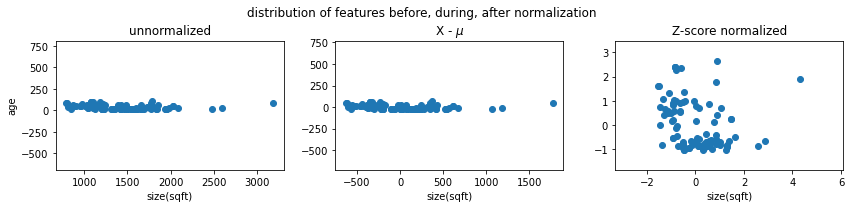

In [36]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [37]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [45]:
import numpy.linalg as LA
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = LA.norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

AttributeError: 'function' object has no attribute 'pdf'

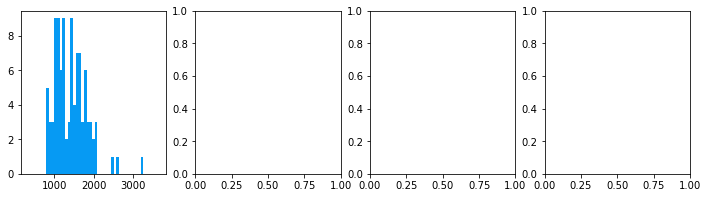

In [46]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

For the rest of the visualization go [here](https://www.coursera.org/learn/machine-learning/ungradedLab/kIf25/optional-lab-feature-scaling-and-learning-rate/lab?path=%2Fnotebooks%2FC1_W2_Lab03_Feature_Scaling_and_Learning_Rate_Soln.ipynb)